## Get Understand About Dataset

#### What is Servo : In control engineering a servomechanism, usually shortened to servo, is an automatic device that uses error-sensing negative feedback to correct the action of a mechanism. On displacement-controlled applications, it usually includes a built-in encoder or other position feedback mechanism to ensure the output is achieving the desired effect. The term correctly applies only to systems where the feedback or error-correction signals help control mechanical position, speed, attitude or any other measurable variables. For example, an automotive power window control is not a servomechanism, as there is no automatic feedback that controls position—the operator does this by observation. Bycontrast a car's cruise control uses closed-loop feedback, which classifies it as a servomechanism.

#### A data frame with 167 observations on 5 variables, 4 nominal and 1 as the target class. This data set is from a simulation of a servo system involving a servo amplifier, a motor, a lead screw/nut, and a sliding carriage of some sort. It may have been on of the translational axes of a robot on the 9th floor of the A1 lab. In any case, the output value is almost certainly a rise time, or the time required for the system to respond to a step change in a position set point. The variables that describe the data set and their values are the following:

#### 1. Motor - A,B,C,D,E
#### 2. Screw - A,B,C,D,E
#### 3. Pgain - 3,4,5,6
#### 4. vgain - 1,2,3,4,5
#### 5. Class 0.13 to 7.10

### Import Library

In [64]:
import pandas as pd
import numpy as np

### Import CSV as Dataframe

In [7]:
df=pd.read_csv("Servo Mechanism.csv")

### Get the first five rows of dataset

In [65]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,4,4,5,4,4
1,1,3,6,5,11
2,3,3,4,3,6
3,1,0,3,2,48
4,3,1,6,5,6


### Get information of dataframe

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


### Get the summary statistics

In [66]:
df.describe()

,Motor,Screw,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000,167.000000,167.000000
mean,1.880240,1.814371,4.155689,2.538922,21.173653
std,1.413372,1.437965,1.017770,1.369850,13.908038
min,0.000000,0.000000,3.000000,1.000000,1.000000
25%,1.000000,0.500000,3.000000,1.000000,10.500000
50%,2.000000,2.000000,4.000000,2.000000,18.000000
75%,3.000000,3.000000,5.000000,4.000000,33.500000
max,4.000000,4.000000,6.000000,5.000000,51.000000


### Get the column names

In [12]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

### Get the Shape of Dataframe

In [14]:
df.shape

(167, 5)

### Get Categories and count of categorical variables

In [16]:
df[["Motor"]].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
dtype: int64

In [17]:
df[["Screw"]].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
dtype: int64

### Get Encoding of Categorical Features

In [18]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [19]:
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

### Define y(dependant Variable) and x(independant variable)

In [20]:
y=df['Class']

In [21]:
y.shape

(167,)

In [22]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [23]:
x=df[['Motor','Screw','Pgain','Vgain']]

In [24]:
x=df.drop('Class',axis=1)

In [25]:
x.shape

(167, 4)

In [26]:
x

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


### Get Train Test Split

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2529)

In [34]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

### Get Model Train

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lr=LinearRegression()

In [38]:
lr.fit(x_train,y_train)

LinearRegression()

### Get Model Prediction

In [40]:
y_pred=lr.predict(x_test)

In [41]:
y_pred.shape

(51,)

In [42]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

### Get Model Evaluation

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [46]:
mean_squared_error(y_test,y_pred)

66.03589175595565

In [47]:
mean_absolute_error(y_test,y_pred)

7.190539677251236

In [48]:
r2_score(y_test,y_pred)

0.6807245170563927

### Get Visualization of Actual vs Predicted

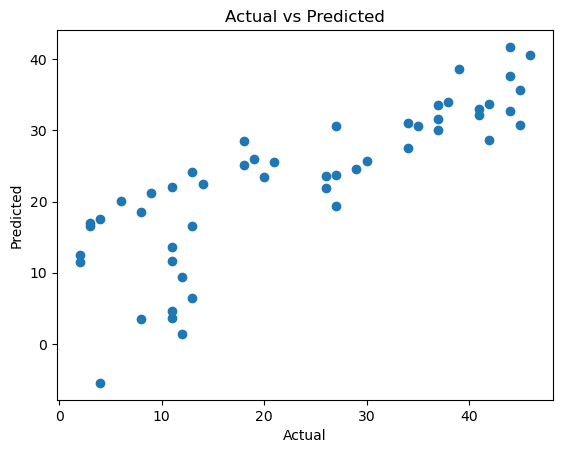

In [51]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

### Get Future Predictions

In [67]:
x_new=df.sample(2)

In [68]:
x_new

,Motor,Screw,Pgain,Vgain,Class
157,0,1,3,1,45
147,3,3,3,2,35


In [69]:
x_new.shape

(2, 5)

In [70]:
x_new =x_new.drop('Class',axis=1)

In [71]:
x_new

,Motor,Screw,Pgain,Vgain
157,0,1,3,1
147,3,3,3,2


In [72]:
x_new.shape

(2, 4)

In [73]:
y_pred_new=lr.predict(x_new)

In [74]:
y_pred_new

array([37.1173224 , 29.59221233])